Data Acquiring

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import yfinance as yf
import pandas as pd

# Define the time period
start_date = "2010-01-01"
end_date = "2023-12-31"

# Fetch stock data using yfinance
stock_data = yf.download("AAPL", start=start_date, end=end_date)

# Display the data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458559  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355827  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344077  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386256  7.570714  7.571429  7.466429  7.510714  447610800


In [12]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22,192.656189,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.108871,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28,192.636261,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


Data Cleaning

In [13]:
stock_data = stock_data.reset_index()

stock_data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447412,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.458559,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.386256,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...,...
3517,2023-12-22,192.656189,193.600006,195.410004,192.970001,195.179993,37122800
3518,2023-12-26,192.108871,193.050003,193.889999,192.830002,193.610001,28919300
3519,2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700


In [14]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)

stock_data.head()

C:\Users\yasee\AppData\Local\Temp\ipykernel_28100\197646068.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


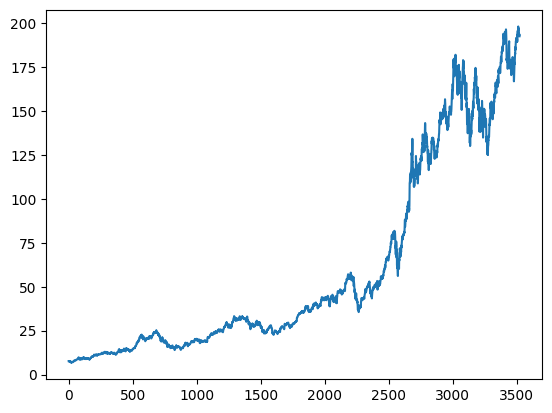

In [15]:
plt.plot(stock_data.Close)

In [16]:
ma100 = stock_data.Close.rolling(100).mean()

ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,181.768301
3518,181.787101
3519,181.898701
3520,182.046001


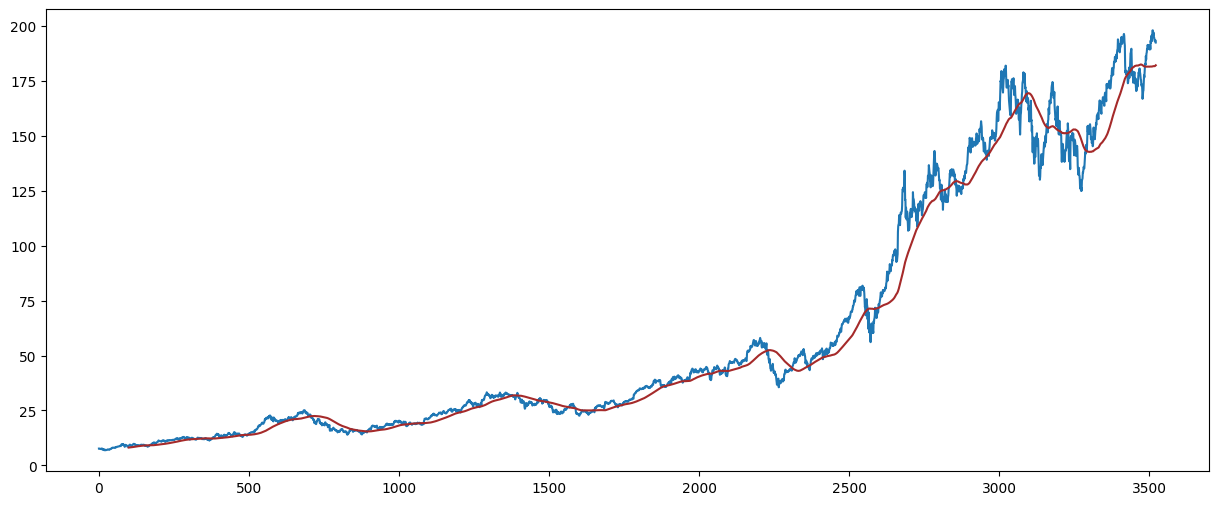

In [17]:
plt.figure(figsize=(15,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'brown')

In [18]:
ma200 = stock_data.Close.rolling(200).mean()

ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,178.649100
3518,178.871851
3519,179.085250
3520,179.290201


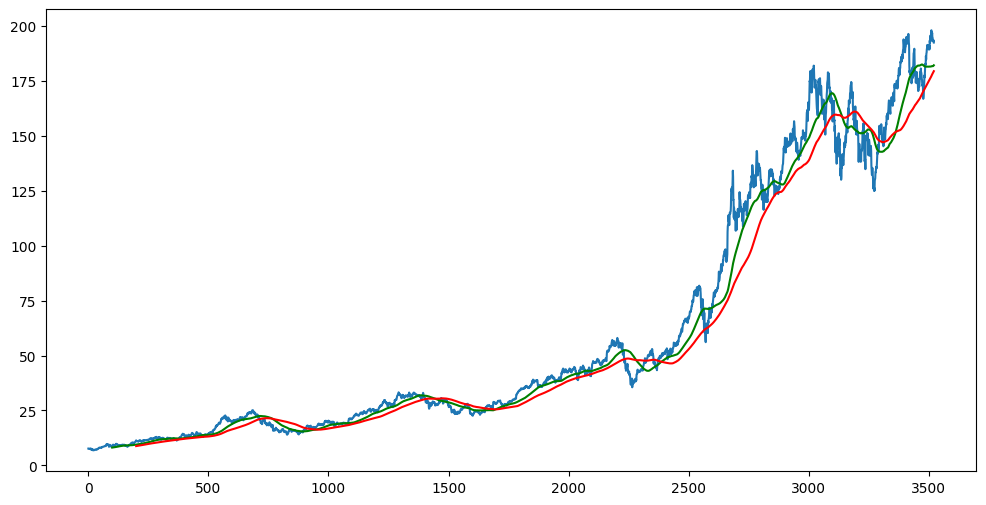

In [19]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [20]:
stock_data.shape

(3522, 5)

Training and Testing Data

In [21]:
data_training = pd.DataFrame(stock_data['Close'][0 : int(len(stock_data) * 0.70)])

data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data) * 0.70): int(len(stock_data))])

In [22]:
data_training.shape


(2465, 1)

In [23]:
data_testing.shape

(1057, 1)

In [24]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [25]:
data_testing.head()

Ticker,AAPL
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [27]:
data_training_array = scaler.fit_transform(data_training)

data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [28]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

Data Modelling

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 180, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

c:\Users\yasee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 180)            │       187,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           181 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,261 (1.03 MB)

 Trainable params: 270,261 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - loss: 0.0789
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - loss: 0.0071
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0059
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 0.0057
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0047
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0053
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0056
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - loss: 0.0044
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0038
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0038
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0037
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0038
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0034
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0029
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [33]:
model.save('keras_model.h5')

In [34]:
data_testing.head()

Ticker,AAPL
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [35]:
data_training.tail(100)

Ticker,AAPL
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

final_df

Ticker,AAPL
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000
...,...
1152,193.600006
1153,193.050003
1154,193.149994
1155,193.580002


In [38]:
input_data = scaler.fit_transform(final_df)

input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [39]:
input_data.shape

(1157, 1)

In [40]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


Prediction Methods

In [42]:
y_predict = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [43]:
y_predict.shape

(1057, 1)

In [44]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [45]:
y_predict

array([[0.15368573],
       [0.1547275 ],
       [0.15582034],
       ...,
       [0.9291363 ],
       [0.92561805],
       [0.92169774]], dtype=float32)

In [46]:
scaler.scale_

array([0.00646057])

In [47]:
scale_factor = 1 / 0.00646057
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

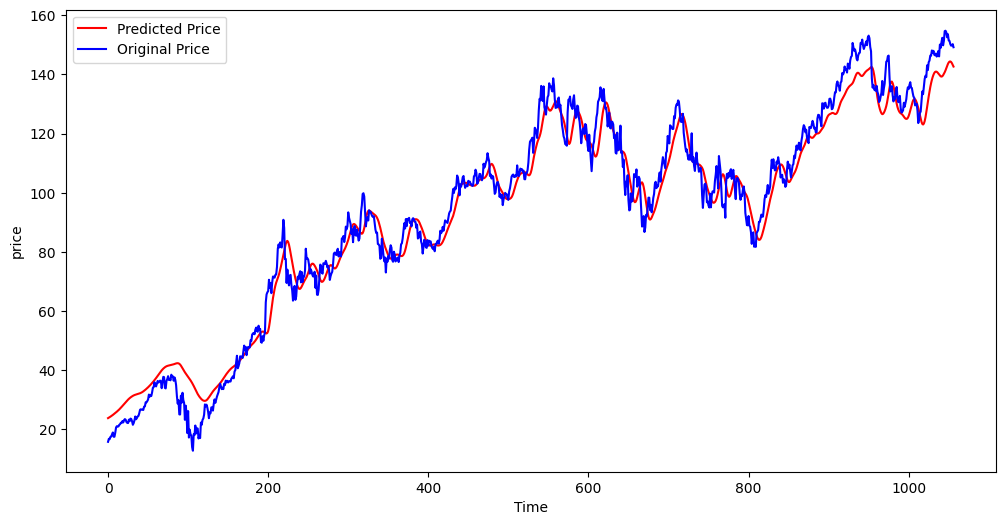

In [48]:
plt.figure(figsize = (12, 6))

plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()